In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

In [4]:
file_path='C:\\Users\\HP\\Desktop\\task-2\\Mall_Customers.csv'
df=pd.read_csv(file_path)
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
scaler=StandardScaler()
s_scaled=scaler.fit_transform(x)

In [7]:
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(s_scaled)
    wcss.append(kmeans.inertia_)

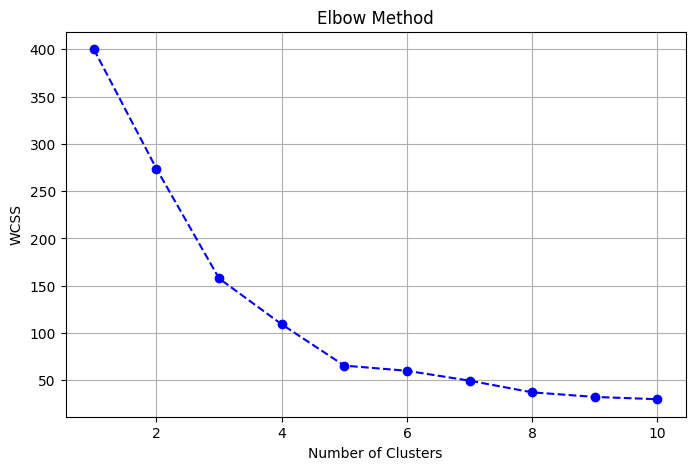

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

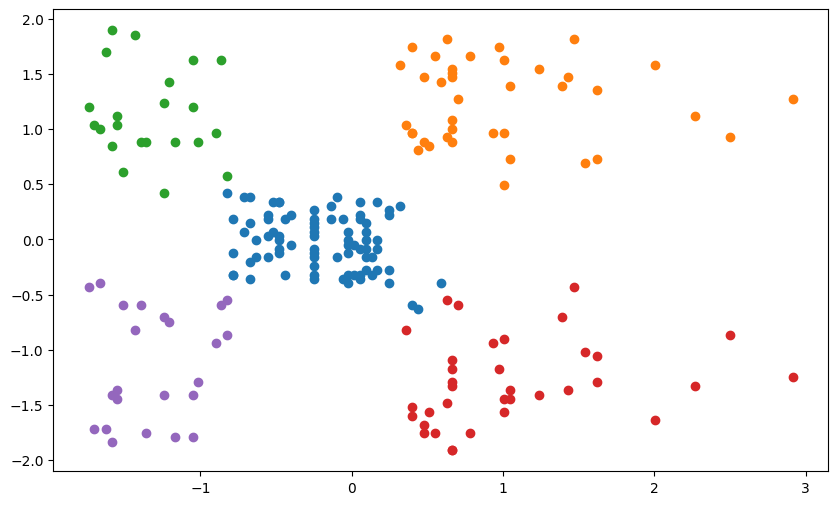

In [10]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(s_scaled)

# Step 6: Add the Cluster Labels to the Original DataFrame
df['Cluster'] = y_kmeans

# Step 7: Visualize the Clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(
        s_scaled[y_kmeans == cluster, 0],
        s_scaled[y_kmeans == cluster, 1],
        label=f'Cluster {cluster}'
    )

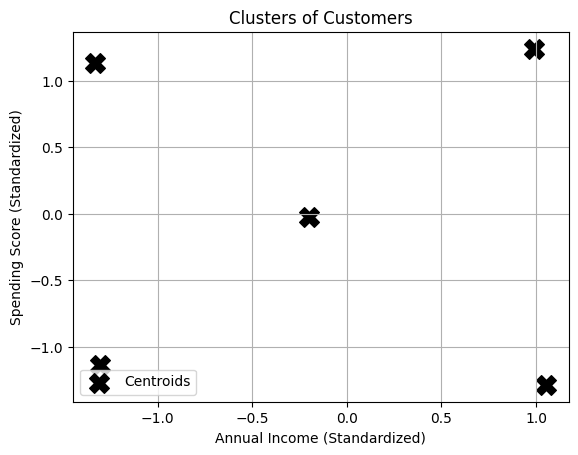

In [11]:
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend()
plt.grid()
plt.show()

In [12]:
print(df.groupby('Cluster').mean())

TypeError: agg function failed [how->mean,dtype->object]

In [13]:
# Group by 'Cluster' and calculate the mean for numeric columns only
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
cluster_means = df.groupby('Cluster')[numeric_columns].mean()

print(cluster_means)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        164.371429  41.114286           88.200000               17.114286
4         23.000000  45.217391           26.304348               20.913043
